In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

2024-03-25 00:18:03.017997: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-25 00:18:03.731851: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv("data/AMZN.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

data = df['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [4]:
def create_dataset(data, time_step):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 12
X, Y = create_dataset(scaled_data, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)

In [5]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

2024-03-25 00:18:04.655729: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-25 00:18:04.656201: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/hrishi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the 

In [6]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [7]:
model.fit(X, Y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0748
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0210 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss

In [8]:
future_period = int(len(df) * 0.1)
future_predictions = []
last_window = scaled_data[-time_step:].reshape(1, time_step, 1)

for i in range(future_period):
    prediction = model.predict(last_window)[0][0]
    future_predictions.append(prediction)
    last_window = np.append(last_window[:, :, :], [[[prediction]]], axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━

In [9]:
last_date = df['Date'].iloc[-1]
date_range = pd.date_range(start=last_date, periods=future_period + 1, freq='M')[1:]

future_df = pd.DataFrame({'Date': date_range, 'Close': future_predictions})
future_df.set_index('Date', inplace=True)

combined_df = pd.concat([df, future_df])

/tmp/ipykernel_8725/3786167462.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=last_date, periods=future_period + 1, freq='M')[1:]


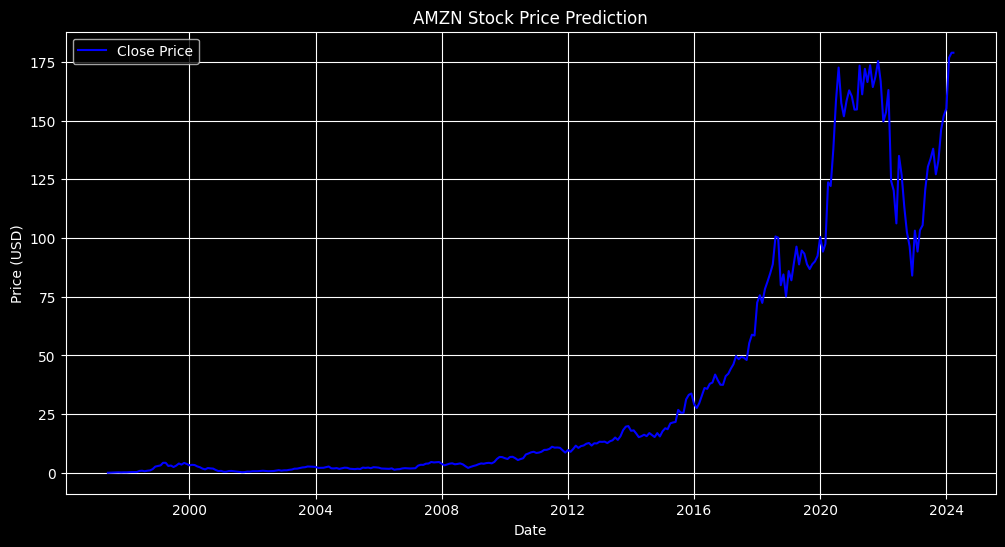

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date'], combined_df['Close'], color='blue', label='Close Price')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

/tmp/ipykernel_8725/1325898840.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=last_date, periods=future_period + 1, freq='M')[1:]


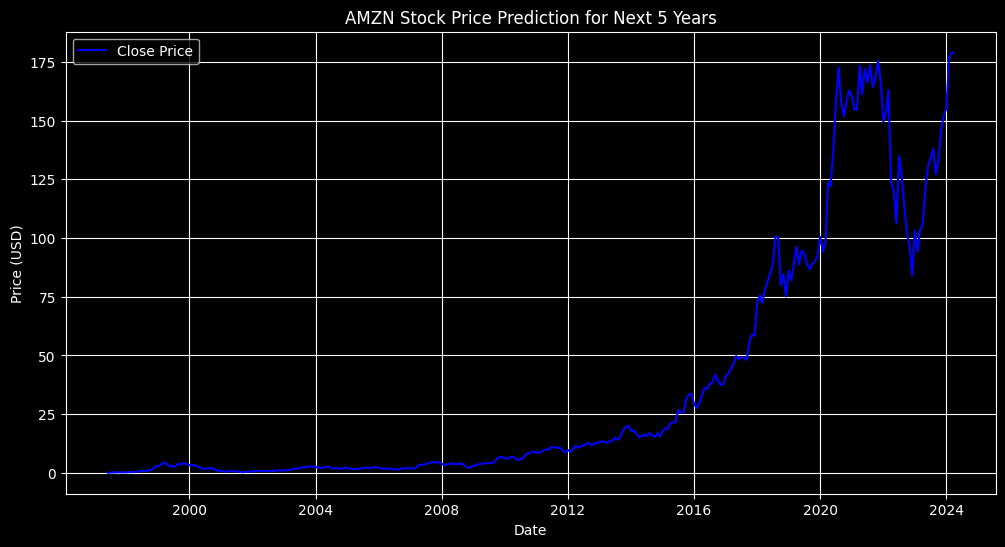

In [11]:
future_period = 60
future_predictions = []
last_window = scaled_data[-time_step:].reshape(1, time_step, 1)

for i in range(future_period):
    prediction = model.predict(last_window)[0][0]
    future_predictions.append(prediction)
    last_window = np.append(last_window[:, :, :], [[[prediction]]], axis=1)


future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

last_date = df['Date'].iloc[-1]
date_range = pd.date_range(start=last_date, periods=future_period + 1, freq='M')[1:]

future_df = pd.DataFrame({'Date': date_range, 'Close': future_predictions})
future_df.set_index('Date', inplace=True)

combined_df = pd.concat([df, future_df])


plt.figure(figsize=(12, 6))
plt.plot(combined_df['Date'], combined_df['Close'], color='blue', label='Close Price')
plt.title('AMZN Stock Price Prediction for Next 5 Years')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
growth_rate = 0.02
future_predictions_growth = future_predictions * \
    (1 + growth_rate) ** np.arange(1, future_period + 1)

np.random.seed(0)
noise_scale = 0.05
rd_ns = np.random.normal(
    scale=noise_scale, size=len(future_predictions_growth))
future_predictions_trend = future_predictions_growth * (1 + rd_ns)

last_date = df['Date'].iloc[-1]

future_date_range = pd.date_range(
    start=last_date, periods=future_period + 1, freq='M')
future_df = pd.DataFrame(
    {'Date': future_date_range[1:], 'Close': future_predictions_trend})
future_df.set_index('Date', inplace=True)

combined_df = pd.concat([df, future_df])
extended_date_range = pd.date_range(
    start=df['Date'].iloc[0], periods=len(combined_df), freq='M')

/tmp/ipykernel_8725/3780393549.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_date_range = pd.date_range(
/tmp/ipykernel_8725/3780393549.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  extended_date_range = pd.date_range(


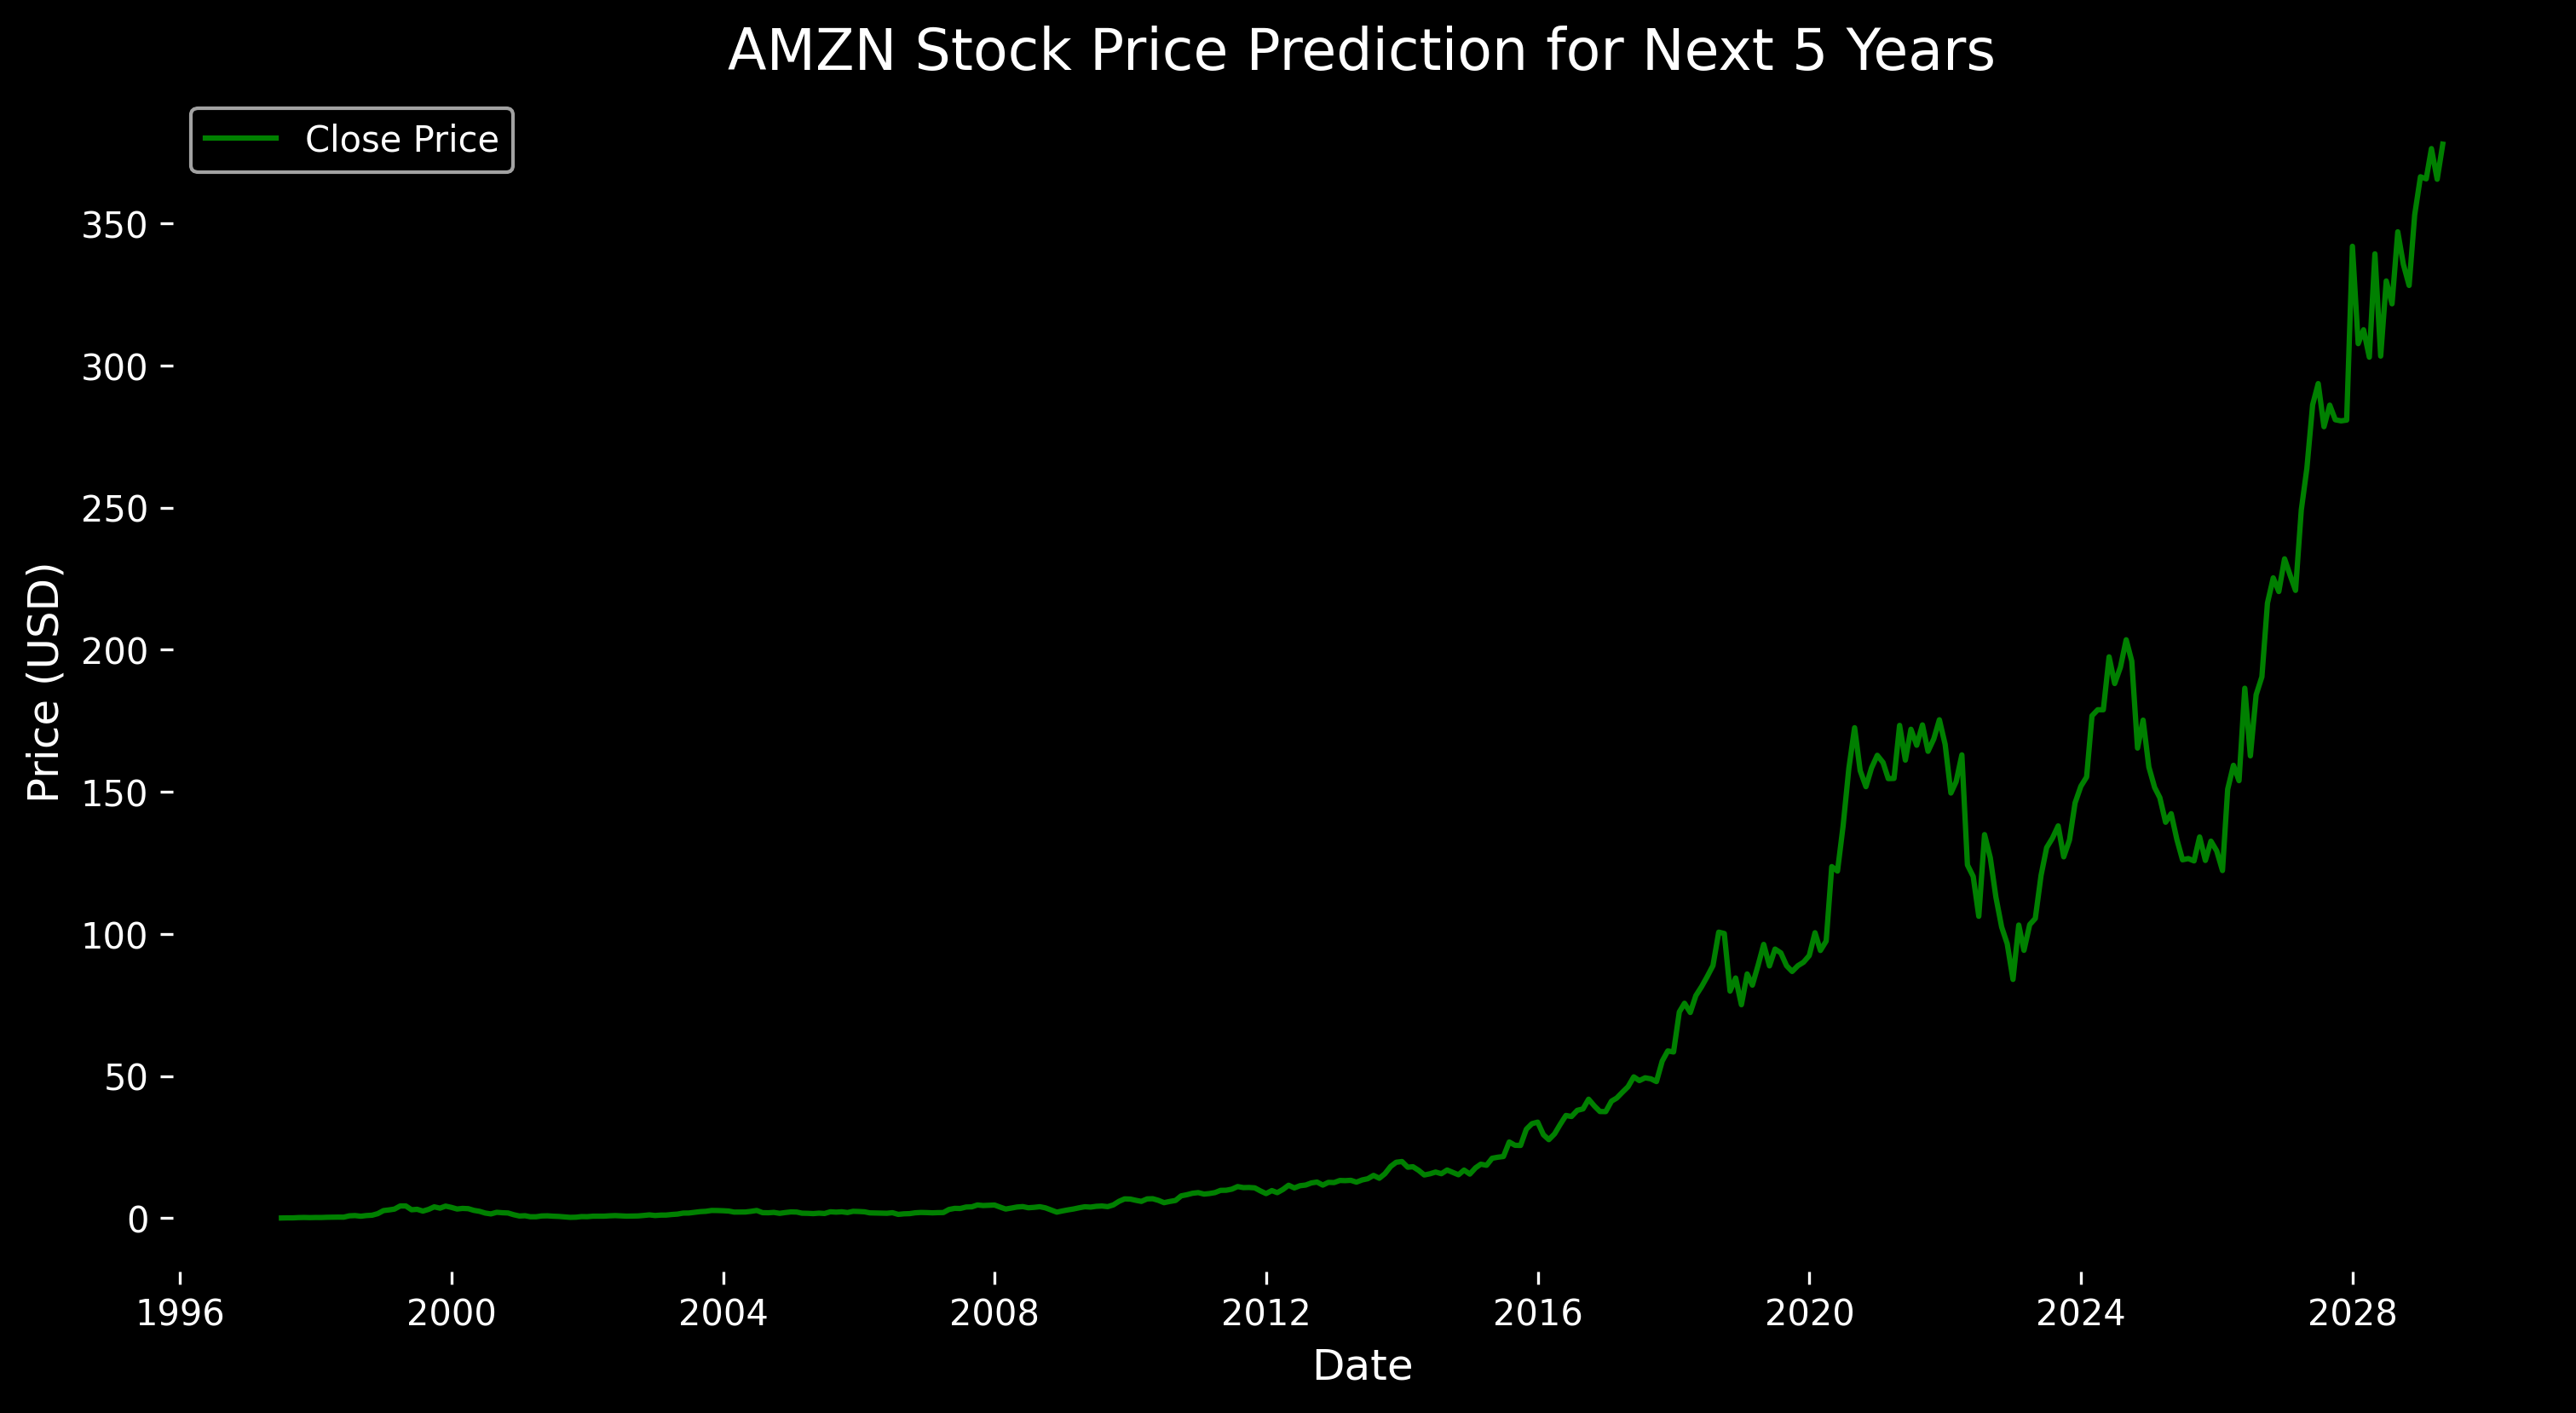

In [14]:
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(extended_date_range, combined_df['Close'], color='green', label='Close Price')
plt.title('AMZN Stock Price Prediction for Next 5 Years', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.box(False)
plt.legend(['Close Price'], loc='upper left', fontsize=10)
plt.show()